In [54]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# load dataset 
DATA_PATH = Path("dataset.csv")
df = pd.read_csv(DATA_PATH)

# shuffle
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# quick check
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    906 non-null    object
 1   intent  906 non-null    object
dtypes: object(2)
memory usage: 14.3+ KB


,text,intent
0,show history for backend releases,deployment_history
1,who coordinates onboarding activities?,onboarding_guide
2,outline escalation process for system outage,escalation_policy
3,Show me all open Jira tickets.,jira_ticket_status
4,where can i see open issues?,jira_ticket_status


In [5]:
# Strip whitespace and standardize
df["text"] = df["text"].astype(str).str.strip()
df["intent"] = df["intent"].astype(str).str.strip()

# Label distribution
label_counts = df["intent"].value_counts()
display(label_counts)


Total rows: 906
Nulls per column:
 text      0
intent    0
dtype: int64

Duplicates: 0

Text length — min: 13 | median: 37.0 | max: 61


intent
escalation_policy     97
code_review_policy    96
team_structure        96
onboarding_guide      96
deployment_process    95
employees_info        87
jira_ticket_status    87
dev_env_setup         86
deployment_history    86
out_of_scope          80
Name: count, dtype: int64

In [41]:
#split dataset 
X = df["text"]
y = df["intent"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Train: 724, Test: 182


In [65]:
# Initialize the TF-IDF vectorizer
"""vectorizer = TfidfVectorizer(
    lowercase=True,          # normalize casing
    stop_words='english',    # drop filler words
    ngram_range=(1,2),       # capture unigrams + bigrams
    max_features=5000        # cap vocab size for stability
)
"""
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range=(1, 3),         # added trigrams
    analyzer='char_wb',         # character-level within words
    max_features=10000
)
# Fit on training text, transform both sets
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"TF-IDF shape (train): {X_train_vec.shape}")
print(f"TF-IDF shape (test): {X_test_vec.shape}")

TF-IDF shape (train): (724, 2494)
TF-IDF shape (test): (182, 2494)


C:\Users\Ayman\Desktop\projects\harri-ai-interview-task\venv\Lib\site-packages\sklearn\feature_extraction\text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [66]:
clf = LogisticRegression(
    max_iter=1000,
    solver="lbfgs",
    multi_class="multinomial",
    random_state=42
)

clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

code_review_policy       0.81      0.89      0.85        19
deployment_history       1.00      0.88      0.94        17
deployment_process       0.89      0.84      0.86        19
     dev_env_setup       0.87      0.76      0.81        17
    employees_info       0.64      0.50      0.56        18
 escalation_policy       0.74      0.85      0.79        20
jira_ticket_status       0.94      0.94      0.94        18
  onboarding_guide       0.84      0.84      0.84        19
      out_of_scope       0.81      0.81      0.81        16
    team_structure       0.57      0.68      0.62        19

          accuracy                           0.80       182
         macro avg       0.81      0.80      0.80       182
      weighted avg       0.81      0.80      0.80       182



C:\Users\Ayman\Desktop\projects\harri-ai-interview-task\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


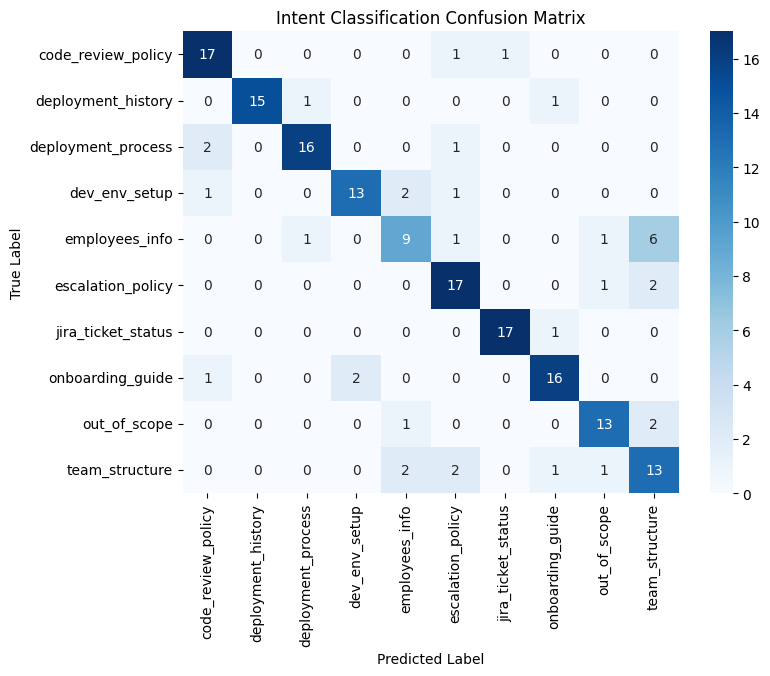

In [67]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm_df = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Intent Classification Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

C:\Users\Ayman\Desktop\projects\harri-ai-interview-task\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Ayman\Desktop\projects\harri-ai-interview-task\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Ayman\Desktop\projects\harri-ai-interview-task\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Mean CV Accuracy: 0.7831609195402298


C:\Users\Ayman\Desktop\projects\harri-ai-interview-task\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Ayman\Desktop\projects\harri-ai-interview-task\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
